In [1]:
print('設定Google網路硬碟，本地端不用這幾行語法')
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

設定Google網路硬碟，本地端不用這幾行語法
Mounted at /content/drive


In [2]:
import tensorflow as tf
model2=tf.keras.models.load_model('/content/drive/MyDrive/Colab第三階段202505/ch6_20250617/minist_model.h5')
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_test.shape)
print(y_test.shape)
print('轉換為CNN所需的規格，多加上一維')
x_test=x_test.reshape(x_test.shape[0],28,28,1)
print(x_test.shape)
print('將圖像特徵縮放在0到1之間')
x_test=x_test.astype('float32')
x_test/=255
category=10 #分類的結果是10個
y_test2=tf.keras.utils.to_categorical(y_test,category)
print(y_test.shape)
print(y_test2.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(10000, 28, 28)
(10000,)
轉換為CNN所需的規格，多加上一維
(10000, 28, 28, 1)
將圖像特徵縮放在0到1之間
(10000,)
(10000, 10)


In [3]:
import numpy as np
print('模型進行預測')
y_pred=model2.predict(x_test)
print(y_pred.shape)
print(y_pred)
y_pred2=np.argmax(y_pred,axis=1)
print(y_pred2.shape)
print(y_pred2)
print('計算混淆矩陣')
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred2)
print(cm)
print('計算準確率')
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred2)
print(accuracy)
wrong1=np.not_equal(y_test,y_pred2)
print(wrong1)
print(np.sum(wrong1))

模型進行預測
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
(10000, 10)
[[0.         0.         0.         ... 0.99999994 0.         0.        ]
 [0.         0.         0.99999994 ... 0.         0.         0.        ]
 [0.         0.99999994 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(10000,)
[7 2 1 ... 4 5 6]
計算混淆矩陣
[[ 940    2    1    0    4    0    7   26    0    0]
 [   0 1132    2    1    0    0    0    0    0    0]
 [  15   18  951    1    6    1    8   32    0    0]
 [   4   33   29  792    2   92    0   57    0    1]
 [   1   28    1    0  913    0    6   32    0    1]
 [   6   27    0    3    3  820   20   10    2    1]
 [  13   23    1    0    8    3  910    0    0    0]
 [   0   10    7    0    0    0    0 1010    0    1]
 [  36  174   44    1   20   66  100 

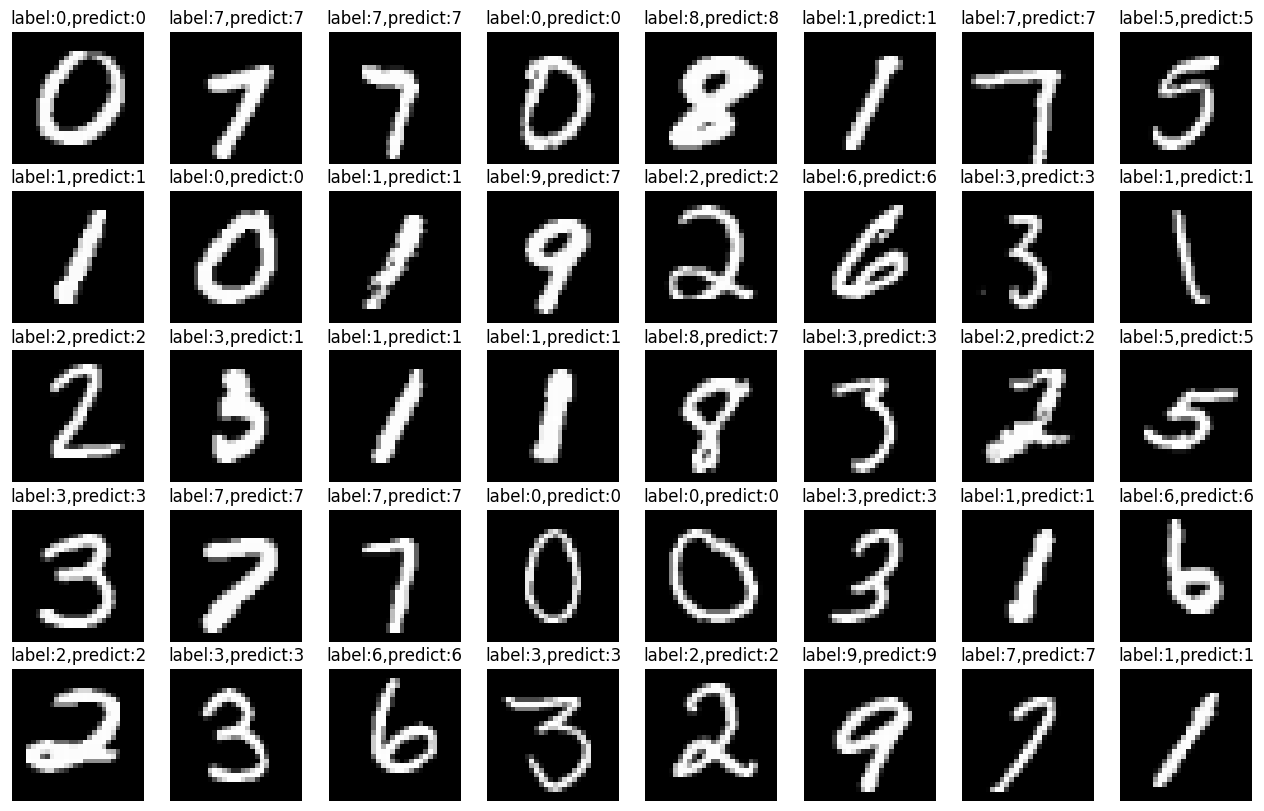

In [4]:
from random import randrange
plt.figure(figsize=(16,10),facecolor='white')
for i in range(5):
  for j in range(8):
    index=randrange(10000)
    plt.subplot(5,8,i*8+j+1)
    plt.axis('off')
    plt.title('label:{},predict:{}'.format(y_test[index],y_pred2[index]))
    plt.imshow(x_test[index],cmap='gray')
plt.show()

In [5]:
from keras.utils import to_categorical
y_train_one_hot=to_categorical(y_train,num_classes=10)
y_test_one_hot=to_categorical(y_test,num_classes=10)
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 150ms/step - accuracy: 0.8583 - loss: 4545.4131 - val_accuracy: 0.1053 - val_loss: 2.2953
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 146ms/step - accuracy: 0.1136 - loss: 2.4975 - val_accuracy: 0.1140 - val_loss: 2.2999
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 145ms/step - accuracy: 0.1124 - loss: 2.3069 - val_accuracy: 0.1139 - val_loss: 2.3000
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 140ms/step - accuracy: 0.1131 - loss: 2.3201 - val_accuracy: 0.1136 - val_loss: 2.3009
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 148ms/step - accuracy: 0.1140 - loss: 2.2994 - val_accuracy: 0.1136 - val_loss: 2.3010
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 147ms/step - accuracy: 0.1117 - loss: 2.3068 - val_accuracy: 0.1136 - val_loss: 2.3010
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 145ms/step - accuracy: 0.1107 - loss: 2.3013 - val_accuracy: 0.1136 - val_loss: 2.3010
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 141ms/step - accuracy: 0.1111 - loss

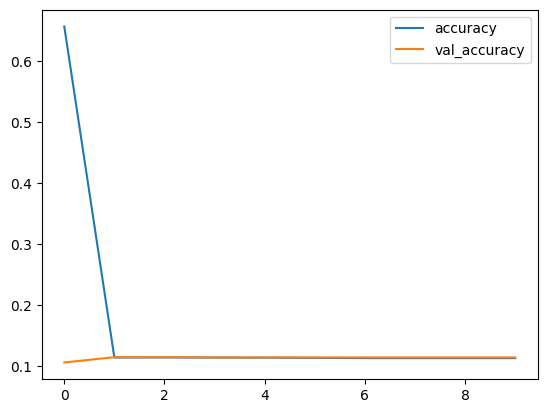

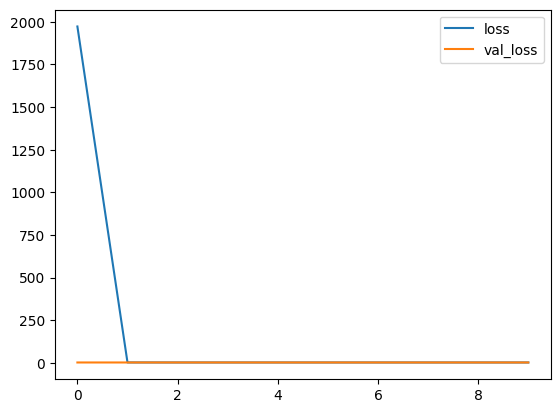

In [6]:
history=model2.fit(x_train,y_train_one_hot,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test_one_hot),validation_split=0.2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [7]:
print('建構CNN模型，並進行訓練')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
model=tf.keras.models.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(filters=40,kernel_size=(2,2),padding='same',activation='relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=40,kernel_size=(2,2),padding='same',activation='relu'))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

建構CNN模型，並進行訓練


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 40)     │         5,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 40)     │         6,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7840)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       784,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 817,230 (3.12 MB)

 Trainable params: 817,230 (3.12 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 146ms/step - accuracy: 0.1139 - loss: 2.3007 - val_accuracy: 0.1136 - val_loss: 2.3010
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 140ms/step - accuracy: 0.1159 - loss: 2.3004 - val_accuracy: 0.1136 - val_loss: 2.3010
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 144ms/step - accuracy: 0.1122 - loss: 2.3009 - val_accuracy: 0.1136 - val_loss: 2.3009
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 145ms/step - accuracy: 0.1147 - loss: 2.3009 - val_accuracy: 0.1136 - val_loss: 2.3010
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 145ms/step - accuracy: 0.1126 - loss: 2.3008 - val_accuracy: 0.1135 - val_loss: 2.3009
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 142ms/step - accuracy: 0.1151 - loss: 2.3007 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 145ms/step - accuracy: 0.1112 - loss: 2.3014 - val_accuracy: 0.1136 - val_loss: 2.3010
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 145ms/step - accuracy: 0.1131 - loss: 2

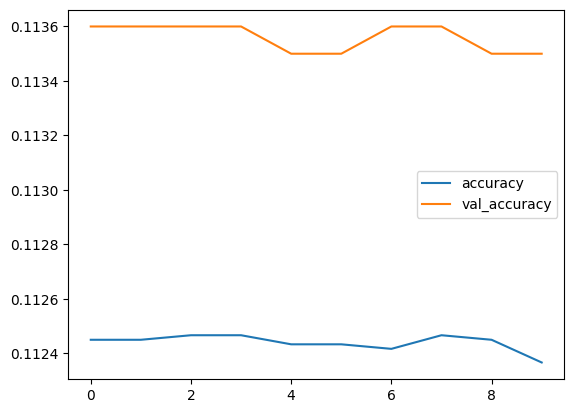

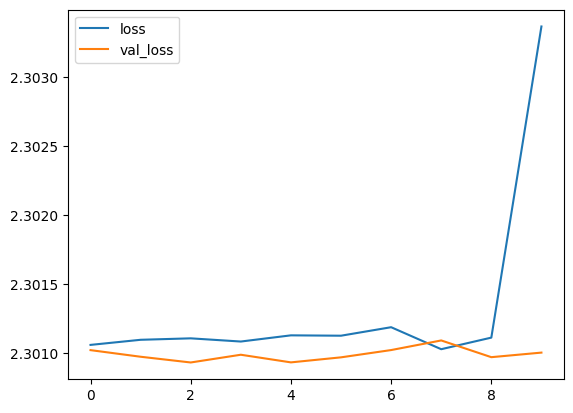

In [8]:
history=model2.fit(x_train,y_train_one_hot,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test_one_hot),validation_split=0.2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [9]:
print('建構CNN模型，並進行訓練')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
model=tf.keras.models.Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

建構CNN模型，並進行訓練


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221,994 (867.16 KB)

 Trainable params: 221,994 (867.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 144ms/step - accuracy: 0.1117 - loss: 2.3011 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 146ms/step - accuracy: 0.1129 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 141ms/step - accuracy: 0.1114 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 145ms/step - accuracy: 0.1102 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 143ms/step - accuracy: 0.1119 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 68s 145ms/step - accuracy: 0.1128 - loss: 2.3011 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 141ms/step - accuracy: 0.1138 - loss: 2.3012 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 146ms/step - accuracy: 0.1118 - loss: 2

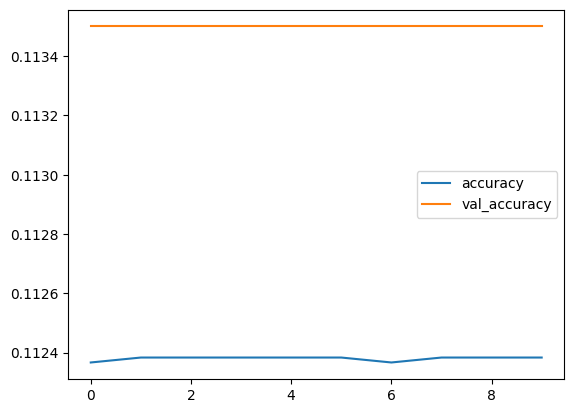

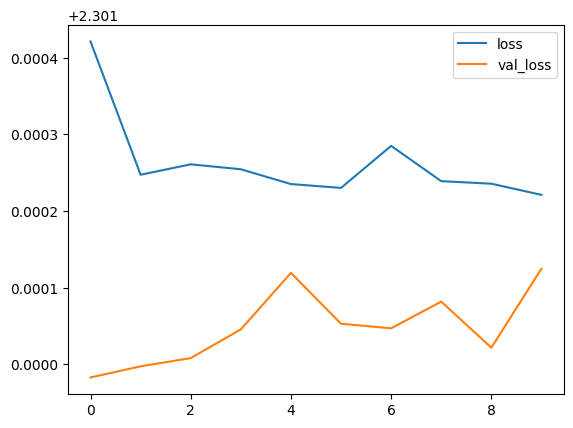

In [10]:
history=model2.fit(x_train,y_train_one_hot,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test_one_hot),validation_split=0.2)
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [11]:
print('針對測試資料進行驗證')
score=model.evaluate(x_test,y_test2,verbose=1)
print('測試資料的 loss:',score[0])
print('測試資料的 accuracy:',score[1])
print('模型儲存')
model.save('minist_model.h5')

針對測試資料進行驗證
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.0967 - loss: 2.3071


測試資料的 loss: 2.3053417205810547
測試資料的 accuracy: 0.10509999841451645
模型儲存
